In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

VFILE = "Mario.mp4"
KEY_ESC = 27

In [41]:
def get_video_data(file):
    video = cv2.VideoCapture(file)
    fps = round(video.get(cv2.CAP_PROP_FPS))
    framerate = round(1000 / fps) # 1000 ms / FPS
    resolution = (round(video.get(cv2.CAP_PROP_FRAME_WIDTH)),round(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    video.release()
    print(framerate)
    print(fps)
    print(resolution)
    return framerate, fps, resolution

In [45]:
FRAMERATE, FPS, RESOLUTION = get_video_data(VFILE)

42
24
(480, 480)


In [43]:
def get_frames(file):
    video = cv2.VideoCapture(file)
    while video.isOpened():
        r, frame = video.read() # Read video frame
        if r: # True if video is retrieved
            yield frame # Output frame
        else:
            break
    video.release() # Release resources
    return None # Return None
    

In [7]:
for f in get_frames(VFILE):
    if f is None:
        break # End of Video
    cv2.imshow('RGB to Black & White',f) # Show frame
    if cv2.waitKey(FRAMERATE) == KEY_ESC: # stop video (Also causes delay)
        break 
cv2.destroyAllWindows() # Release resources

In [8]:
def get_frame(file, index):
    video = cv2.VideoCapture(file)
    counter = 0
    while video.isOpened():
        r, frame = video.read()
        if r:
            if counter == index:
                video.release()
                return frame
            counter += 1
        else:
            break
    video.release()
    return None

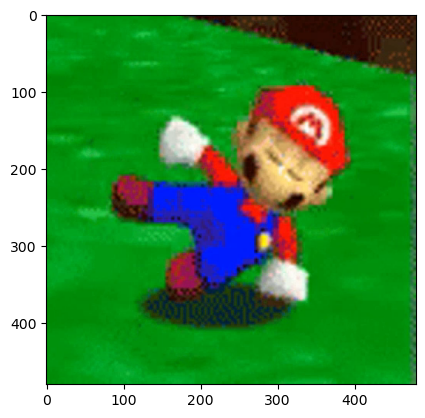

In [19]:
# RGB to Bl&W - Testing a singular frame
frame = cv2.cvtColor(get_frame(VFILE, 10), cv2.COLOR_BGR2RGB)
plt.imshow(frame)

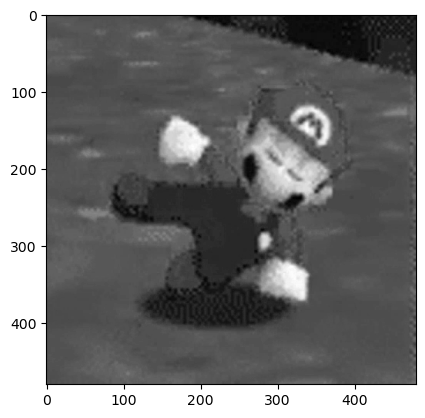

In [10]:
# RGB to Grayscale (weight) = 0.2989 R + 0.5870 G + 0.1140 B 
Bl_W_frame = np.dot(frame, np.array([0.2989,0.5870,0.114]))
Bl_W_frame = Bl_W_frame.astype(np.uint8) # Converting units back to uint8
plt.imshow(Bl_W_frame, cmap='gray') 

In [50]:
# Converting and Playing Video in Black and White
for f in get_frames(VFILE):
    if f is None:
        break # End of Video
        
    # Convert frame
    f = np.dot(f, np.array([0.114,0.5870,0.2989]))
    f = f.astype(np.uint8) # Converting units back to uint8
    
    cv2.imshow('RGB to Black & White',f) # Show frame
    if cv2.waitKey(FRAMERATE) == KEY_ESC: # stop video (Also causes delay)
        break 
cv2.destroyAllWindows() # Release resources
    

In [51]:
# Output video to disk
fourcc = cv2.VideoWriter_fourcc('M','P','4','V') # MP4V Format Output
video_out = cv2.VideoWriter("output.mp4",fourcc,FPS,RESOLUTION) # (filename,fourcc,frames per sec, resolution)

for f in get_frames(VFILE):
    if f is None:
        break # End of Video
        
    # Convert frame
    f = np.dot(f, np.array([0.114,0.5870,0.2989]))
    f = f.astype(np.uint8) # Converting units back to uint8
    
    # Expand to 3-Channel Grayscale
    f = np.repeat(np.expand_dims(f, axis=2), 3, axis=2)
    
    
    video_out.write(f) # Write frame to output
    
video_out.release() # Release resources
